#  Creating_Network_Visualizations

### importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data

relationship_df = pd.read_csv('20th_century_relationship.csv', index_col = 0)

In [3]:
relationship_df.head(5)

,source,target,value
0,france,russia,12
1,germany,russia,26
2,bulgaria,germany,6
3,bulgaria,russia,6
4,germany,italy,26


In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

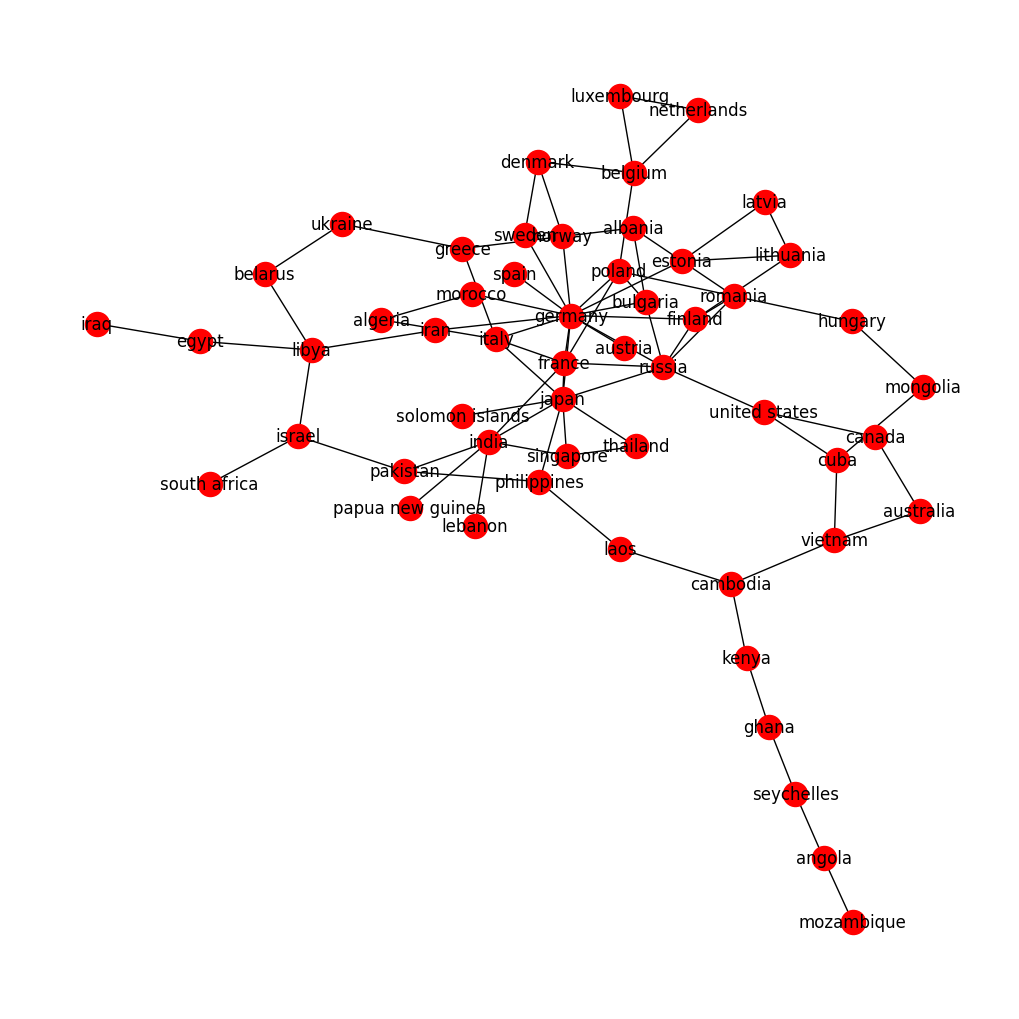

In [5]:
# Graph visualization - Networkx
h = plt.figure(figsize = (10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [6]:
h.savefig('networkx_plt_20th_century.png')

## Graph visualization - Pyvis

In [8]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [9]:
net.write_html ("network_20th_century.html")

##  detection - Leiden algorithm

In [10]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'bayanpy', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer'}


In [11]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [12]:
new_com = coms.to_node_community_map()

In [13]:
new_com

defaultdict(list,
            {'france': [0],
             'russia': [0],
             'germany': [0],
             'bulgaria': [0],
             'austria': [0],
             'spain': [0],
             'poland': [0],
             'finland': [0],
             'albania': [0],
             'romania': [0],
             'japan': [1],
             'thailand': [1],
             'singapore': [1],
             'philippines': [1],
             'solomon islands': [1],
             'india': [1],
             'pakistan': [1],
             'papua new guinea': [1],
             'lebanon': [1],
             'hungary': [2],
             'mongolia': [2],
             'cuba': [2],
             'united states': [2],
             'canada': [2],
             'australia': [2],
             'vietnam': [2],
             'laos': [3],
             'cambodia': [3],
             'kenya': [3],
             'ghana': [3],
             'seychelles': [3],
             'angola': [3],
             'mozambique': [3],
    

In [14]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [15]:
dict_com

{'france': 0,
 'russia': 0,
 'germany': 0,
 'bulgaria': 0,
 'austria': 0,
 'spain': 0,
 'poland': 0,
 'finland': 0,
 'albania': 0,
 'romania': 0,
 'japan': 1,
 'thailand': 1,
 'singapore': 1,
 'philippines': 1,
 'solomon islands': 1,
 'india': 1,
 'pakistan': 1,
 'papua new guinea': 1,
 'lebanon': 1,
 'hungary': 2,
 'mongolia': 2,
 'cuba': 2,
 'united states': 2,
 'canada': 2,
 'australia': 2,
 'vietnam': 2,
 'laos': 3,
 'cambodia': 3,
 'kenya': 3,
 'ghana': 3,
 'seychelles': 3,
 'angola': 3,
 'mozambique': 3,
 'belarus': 4,
 'libya': 4,
 'egypt': 4,
 'iraq': 4,
 'israel': 4,
 'south africa': 4,
 'iran': 4,
 'belgium': 5,
 'netherlands': 5,
 'luxembourg': 5,
 'denmark': 5,
 'norway': 5,
 'sweden': 5,
 'italy': 6,
 'greece': 6,
 'ukraine': 6,
 'morocco': 6,
 'algeria': 6,
 'estonia': 7,
 'latvia': 7,
 'lithuania': 7}

In [16]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# observations
 - The countries (communities) are interconnected along different Continents Europe, Africa, South America, Asia
 -  The upper part of the network map has mixture interconnected countries (communities) accross different Continents Africa (Libya, Algeria), Asia (Iraq) and Europe(Ukraine)

# The degree  visualize, closeness, and betweenness centrality

In [17]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'france': 0.11320754716981132,
 'russia': 0.1320754716981132,
 'germany': 0.2641509433962264,
 'bulgaria': 0.07547169811320754,
 'italy': 0.09433962264150943,
 'austria': 0.018867924528301886,
 'spain': 0.018867924528301886,
 'poland': 0.09433962264150943,
 'estonia': 0.05660377358490566,
 'latvia': 0.03773584905660377,
 'lithuania': 0.05660377358490566,
 'finland': 0.07547169811320754,
 'belgium': 0.07547169811320754,
 'netherlands': 0.03773584905660377,
 'luxembourg': 0.03773584905660377,
 'denmark': 0.05660377358490566,
 'norway': 0.03773584905660377,
 'sweden': 0.03773584905660377,
 'albania': 0.05660377358490566,
 'greece': 0.05660377358490566,
 'ukraine': 0.03773584905660377,
 'belarus': 0.03773584905660377,
 'libya': 0.07547169811320754,
 'egypt': 0.03773584905660377,
 'iraq': 0.018867924528301886,
 'japan': 0.16981132075471697,
 'morocco': 0.03773584905660377,
 'algeria': 0.03773584905660377,
 'thailand': 0.03773584905660377,
 'singapore': 0.05660377358490566,
 'philippines': 

In [18]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['characters','centrality'])

In [19]:
degree_df.head(5)

,characters,centrality
0,france,0.113208
1,russia,0.132075
2,germany,0.264151
3,bulgaria,0.075472
4,italy,0.094340


In [20]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [21]:
degree_df.head(5)

,characters,centrality
2,germany,0.264151
25,japan,0.169811
1,russia,0.132075
0,france,0.113208
32,india,0.113208


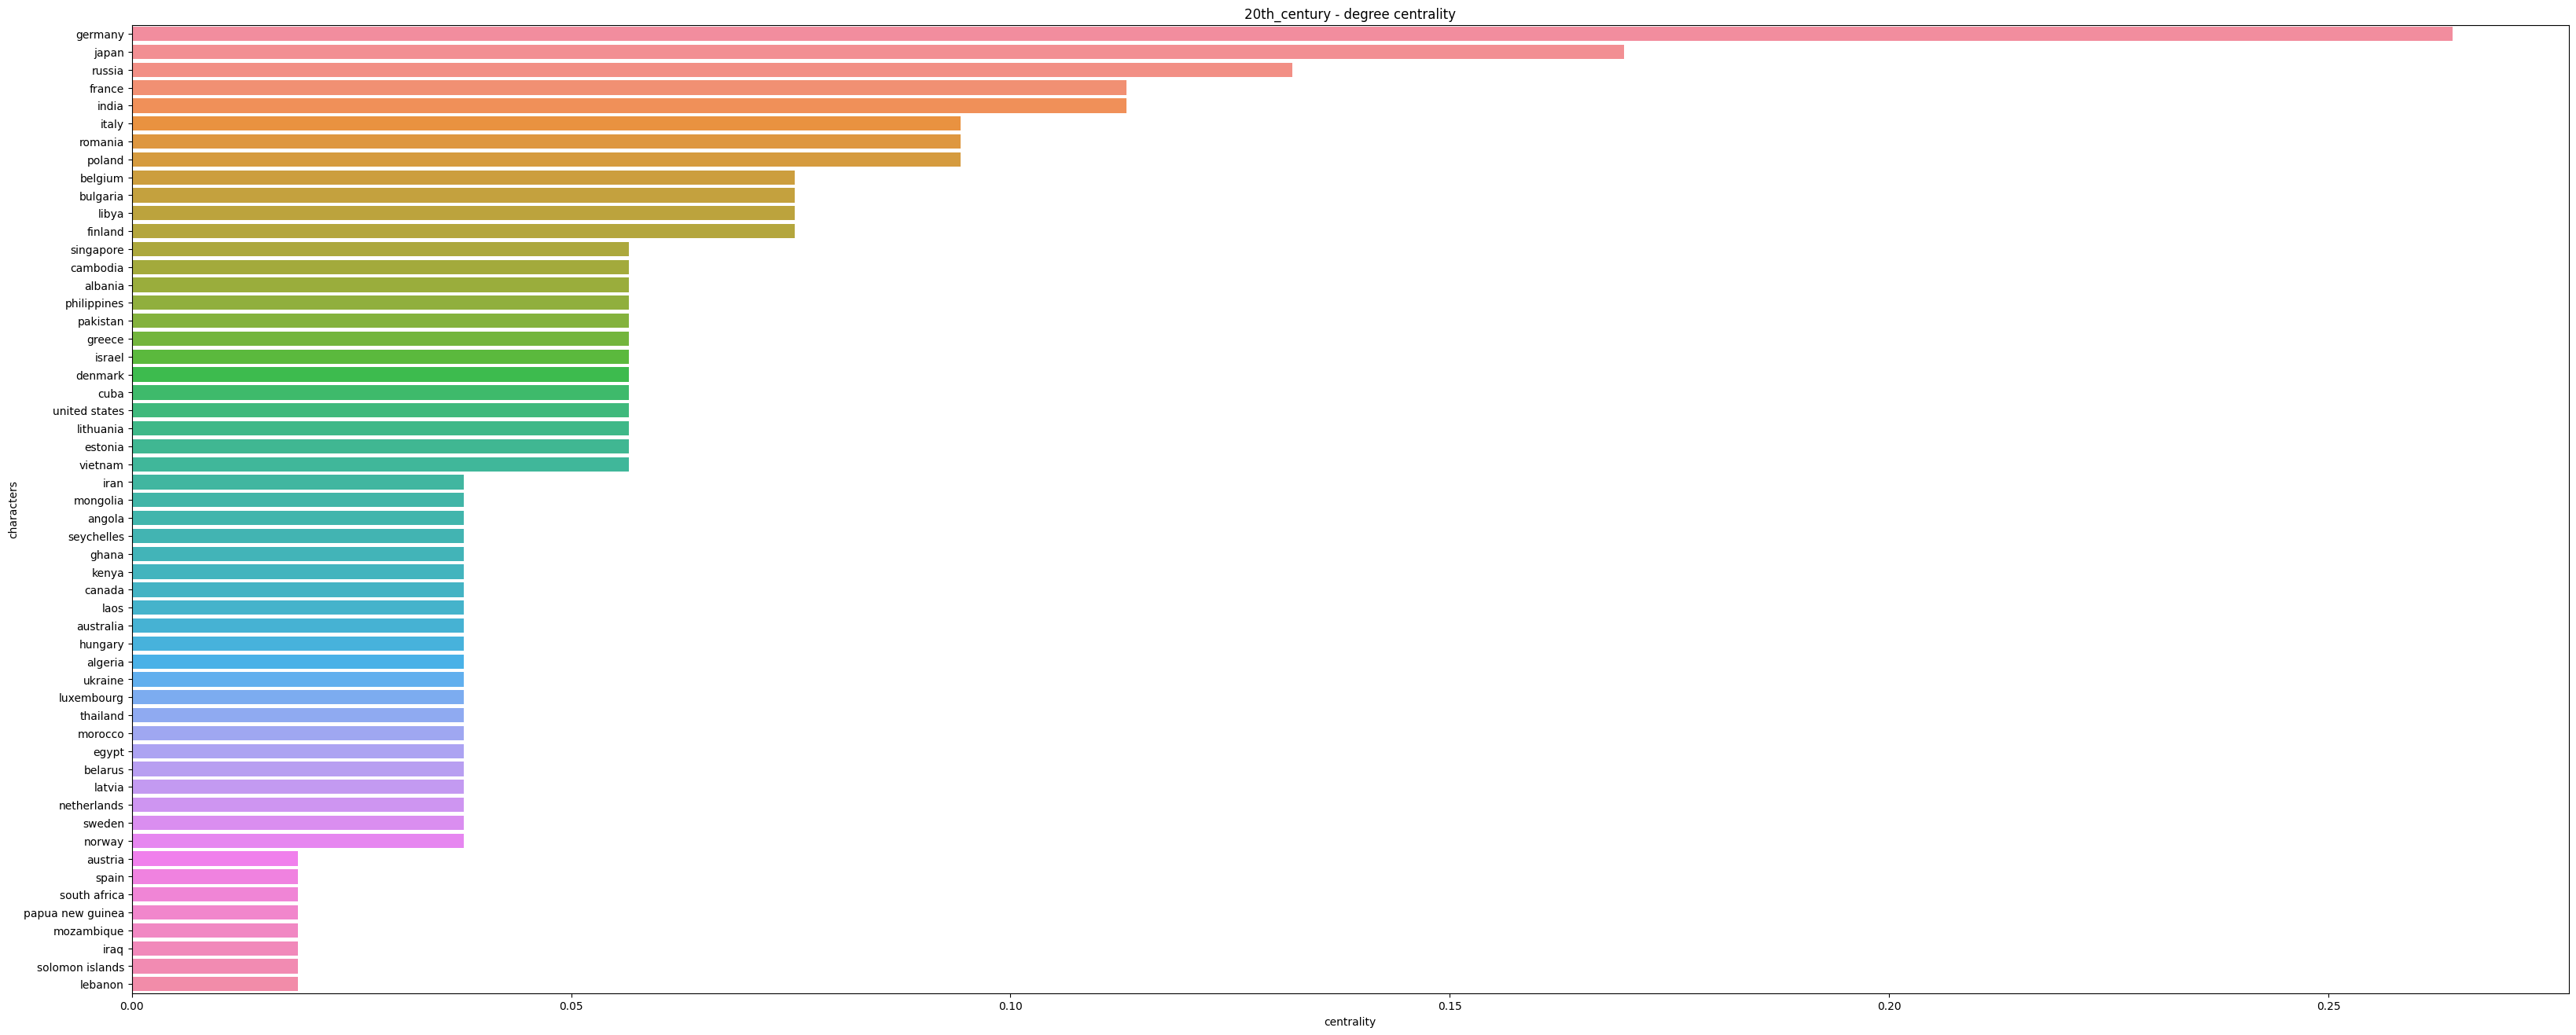

In [22]:
# Plot the degree centrality

plt.figure(figsize = (40, 16))
with sns.dark_palette("xkcd:blue", 44):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = degree_df).set_title("20th_century - degree centrality")

In [23]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['characters','centrality'])

In [24]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

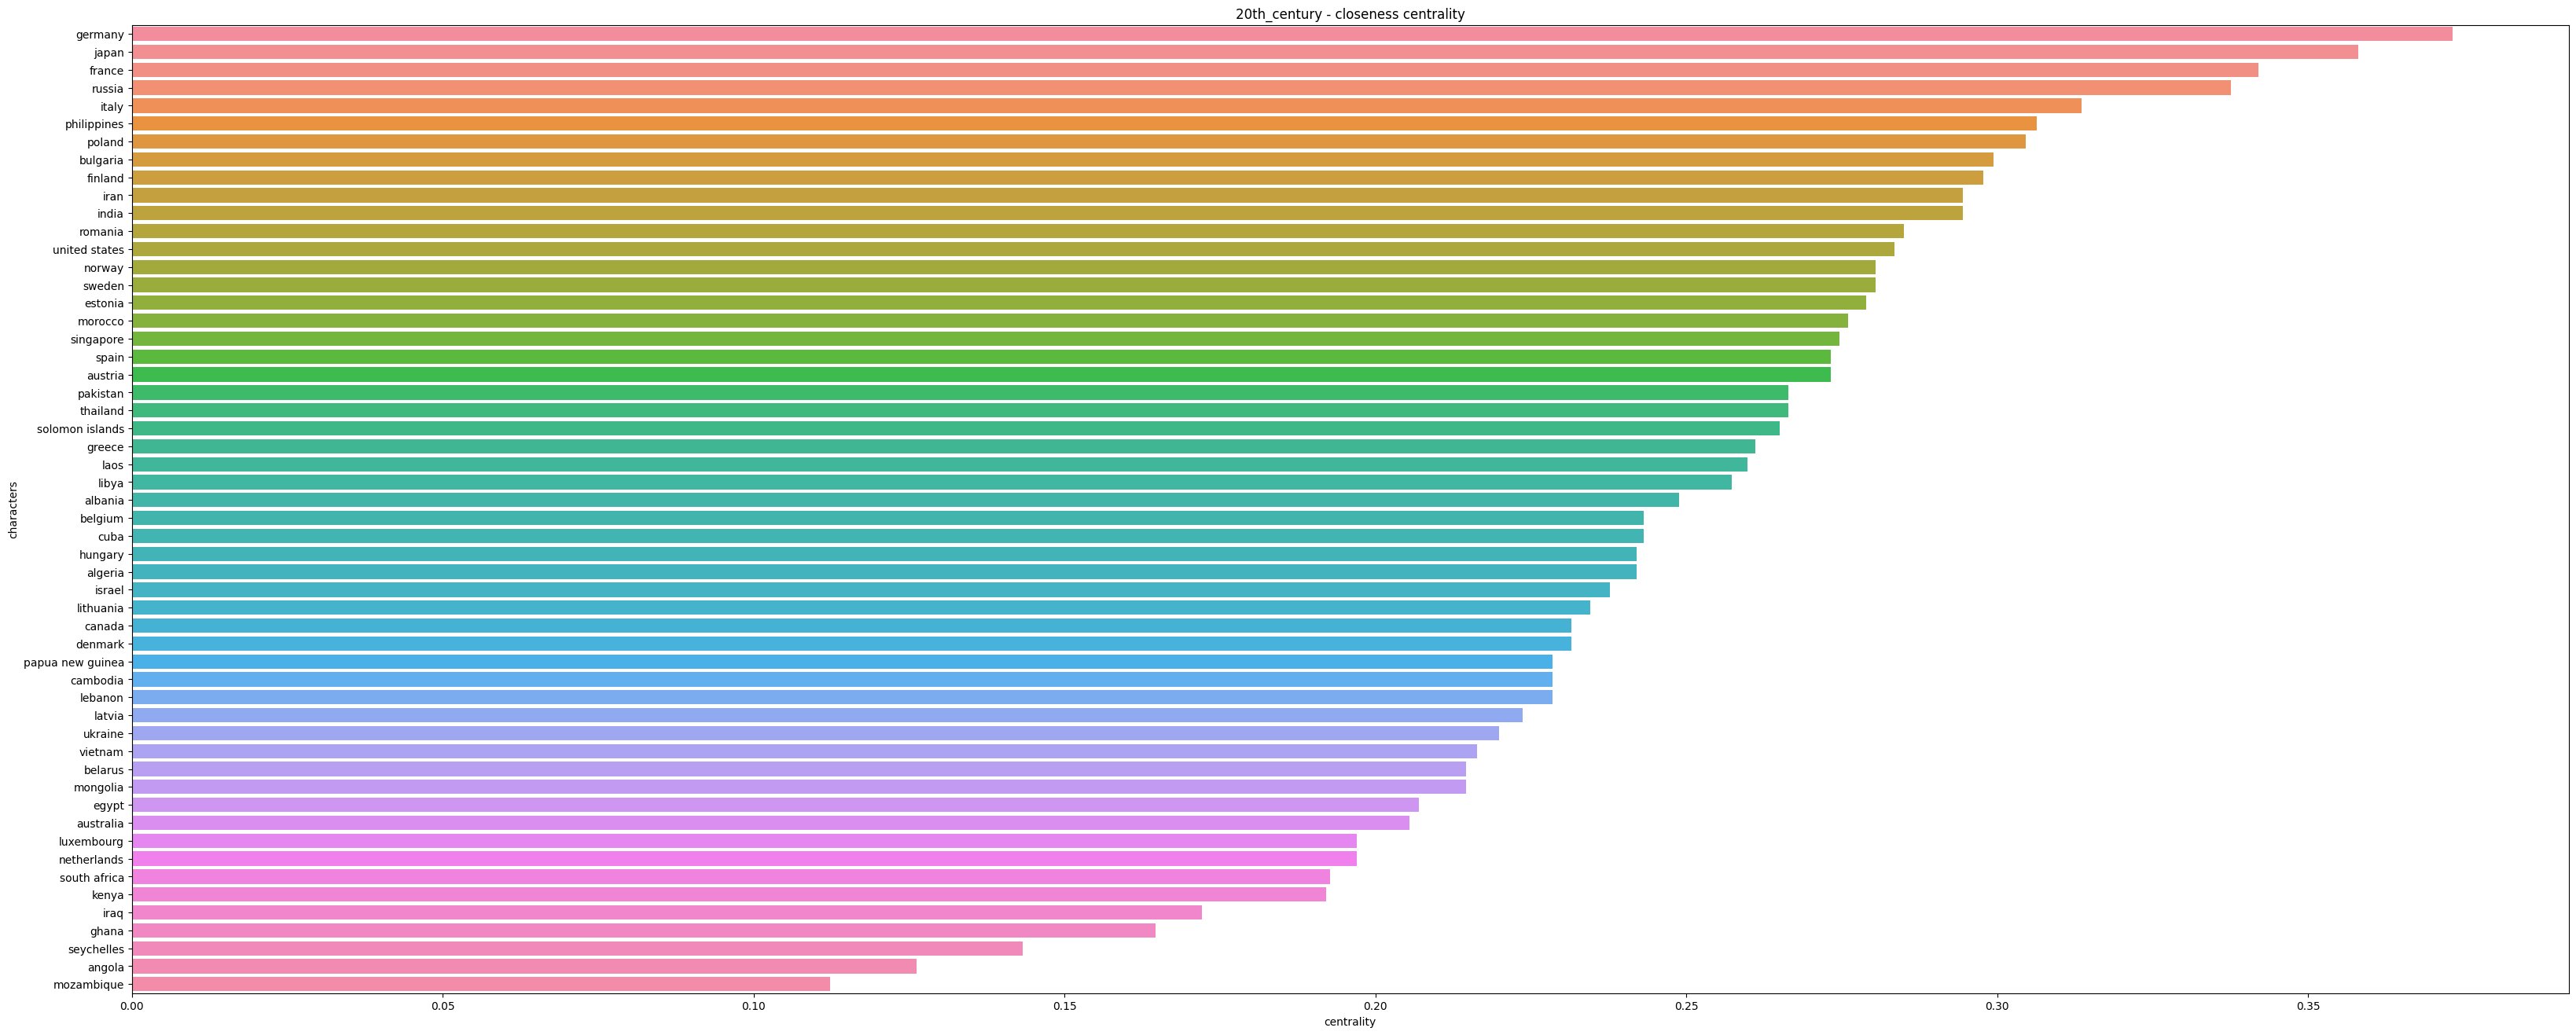

In [25]:
plt.figure(figsize = (40, 16))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = closeness_df).set_title("20th_century - closeness centrality")

In [26]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['characters','centrality'])

In [27]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

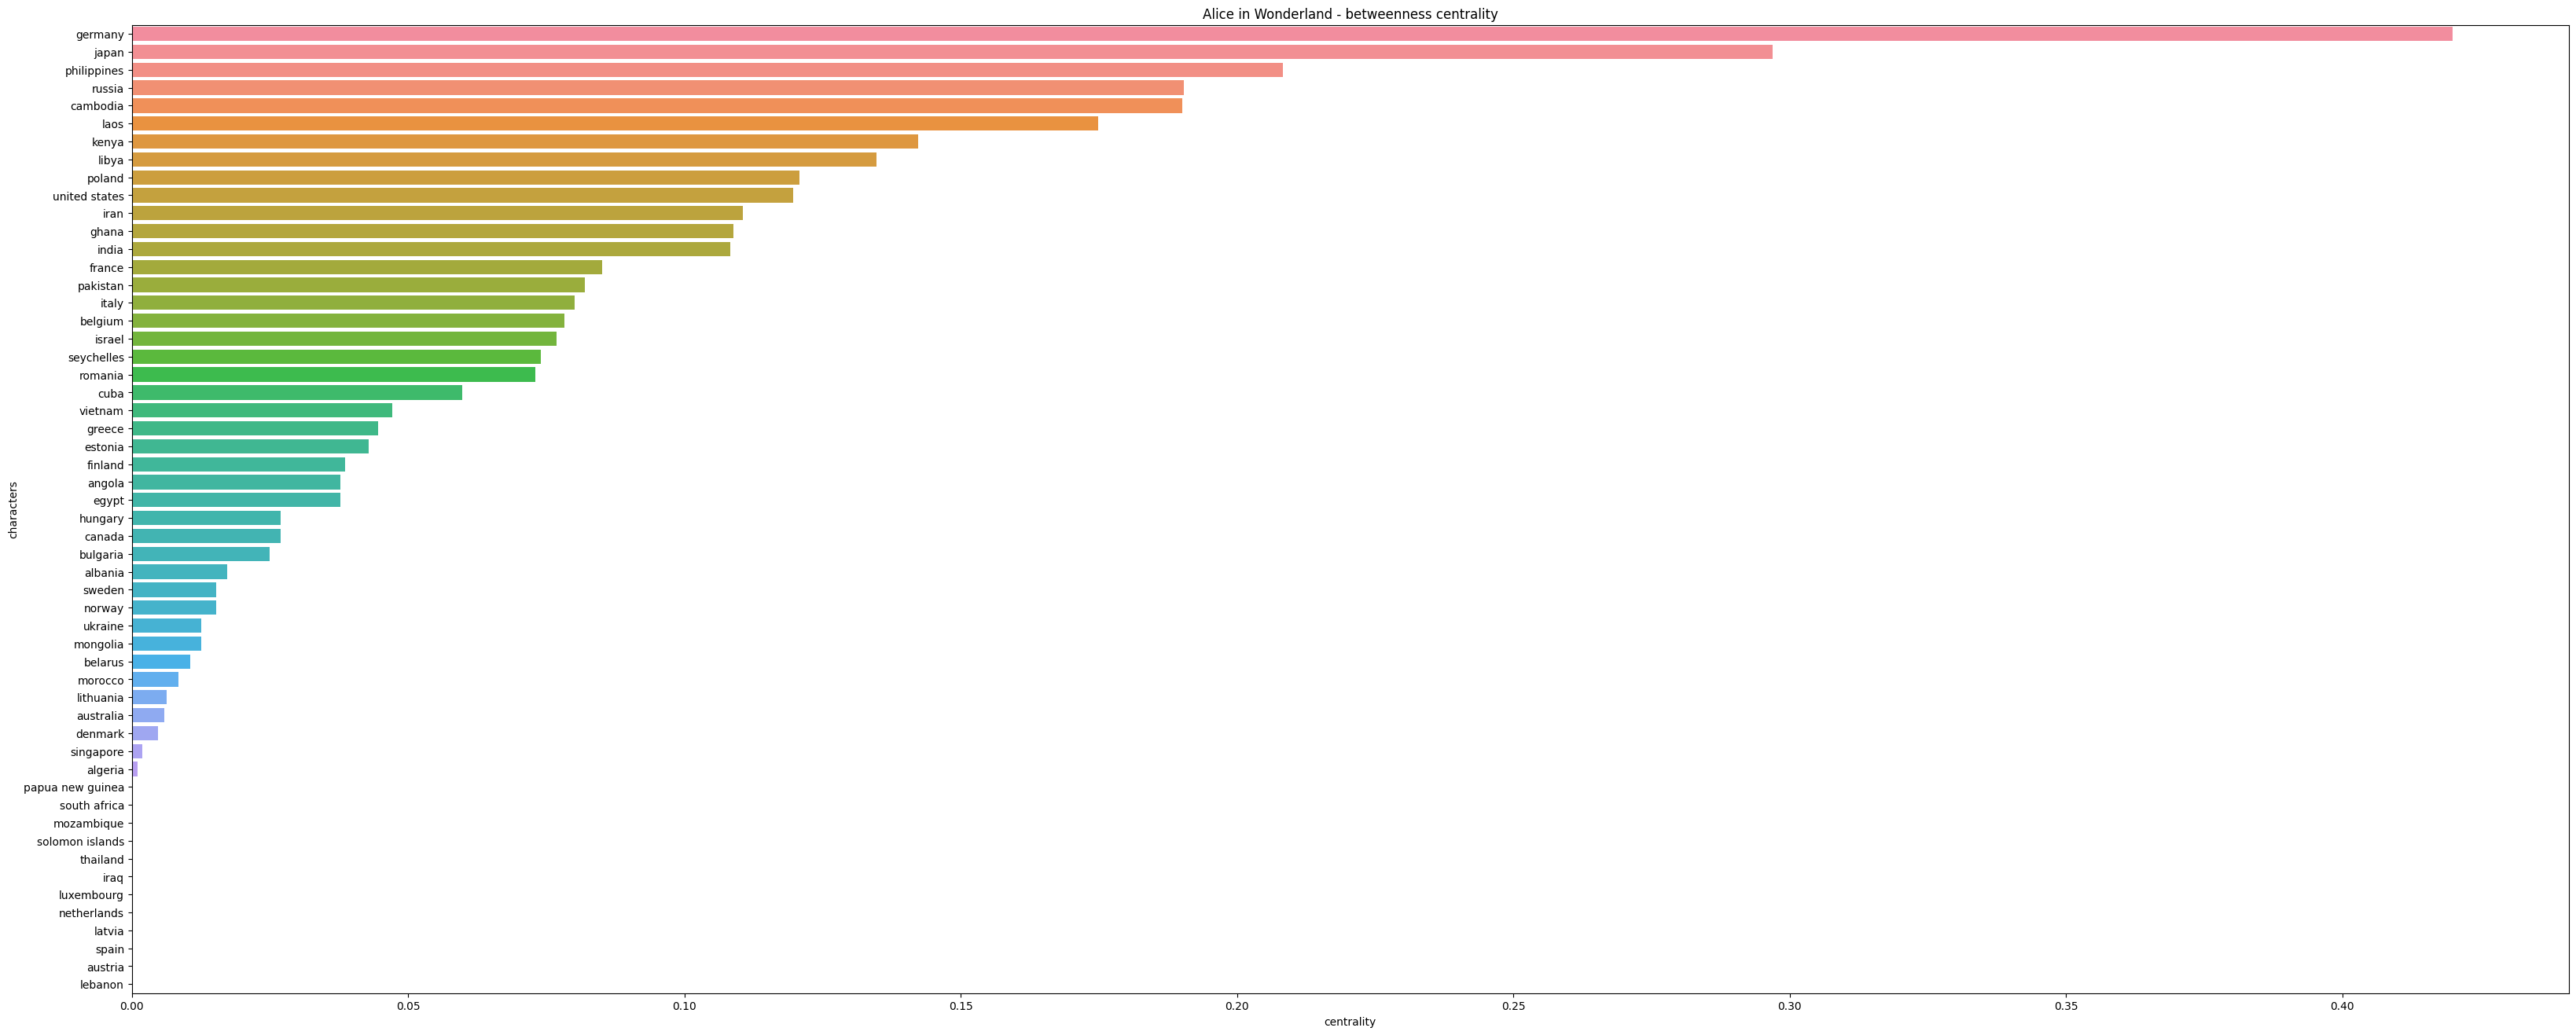

In [28]:
plt.figure(figsize = (40, 16))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = betweennes_df).set_title("Alice in Wonderland - betweenness centrality")